Age of the patient

Gender of the patient

Total Bilirubin

Direct Bilirubin

Alkaline Phosphotase

Alamine Aminotransferase

Aspartate Aminotransferase

Total Protiens

Albumin

Albumin and Globulin Ratio

Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sn

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("liver.csv")

In [4]:
data.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [5]:
data.shape

(583, 11)

In [6]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
data=data[data['Albumin_and_Globulin_Ratio'].notna()]

In [8]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [9]:
data.duplicated().sum()

13

In [10]:
data.drop_duplicates(inplace=True) 
data.reset_index(drop=True, inplace=True)

In [11]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,44.886926,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004,1.286219
std,16.274893,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635,0.452393
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<AxesSubplot:xlabel='Dataset', ylabel='count'>

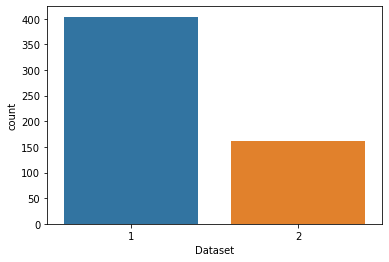

In [12]:
sn.countplot(x=data.Dataset)

<AxesSubplot:>

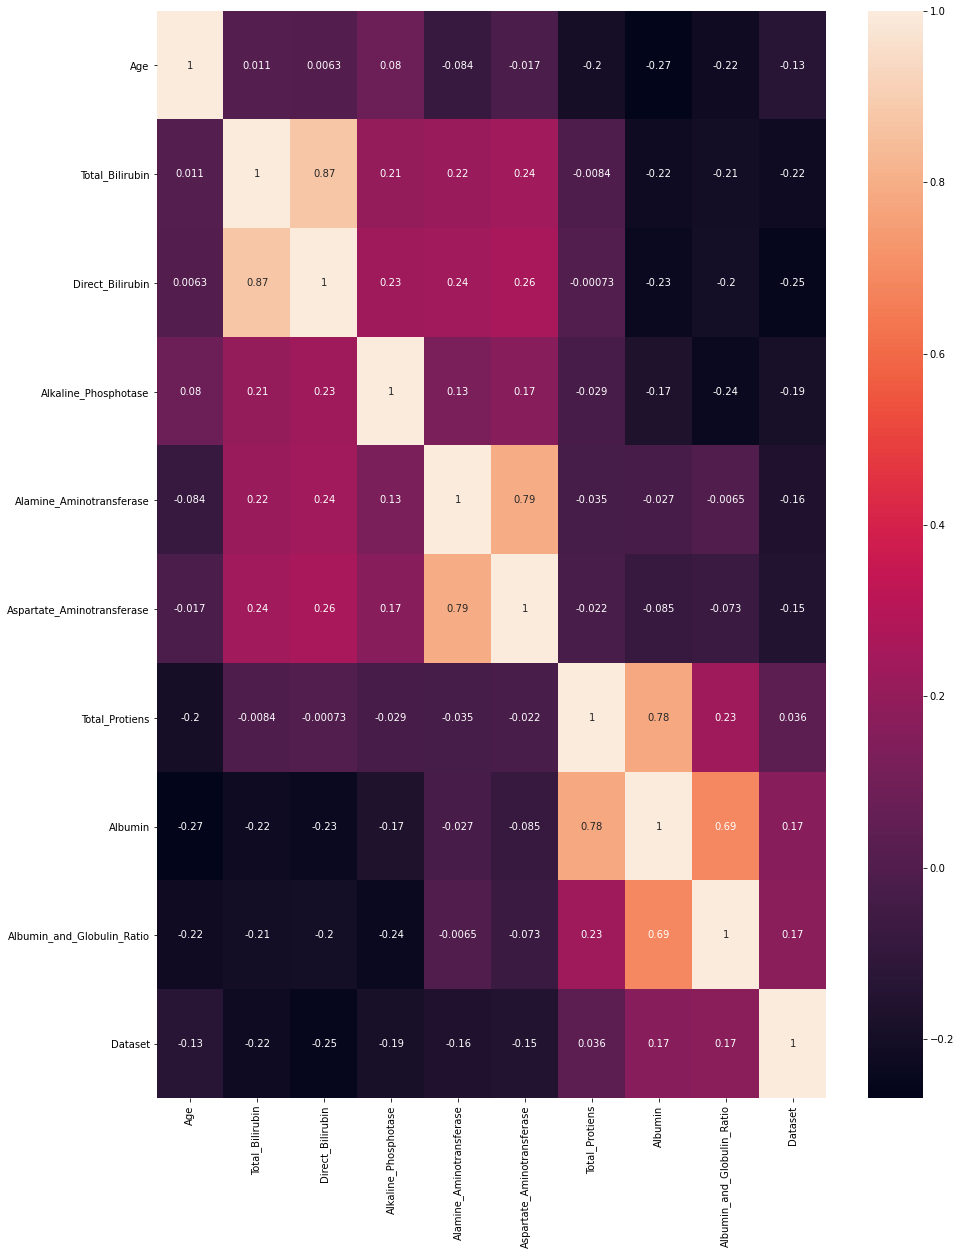

In [13]:
pt.figure(figsize=(15,20))
sn.heatmap(data.corr(),annot=True)

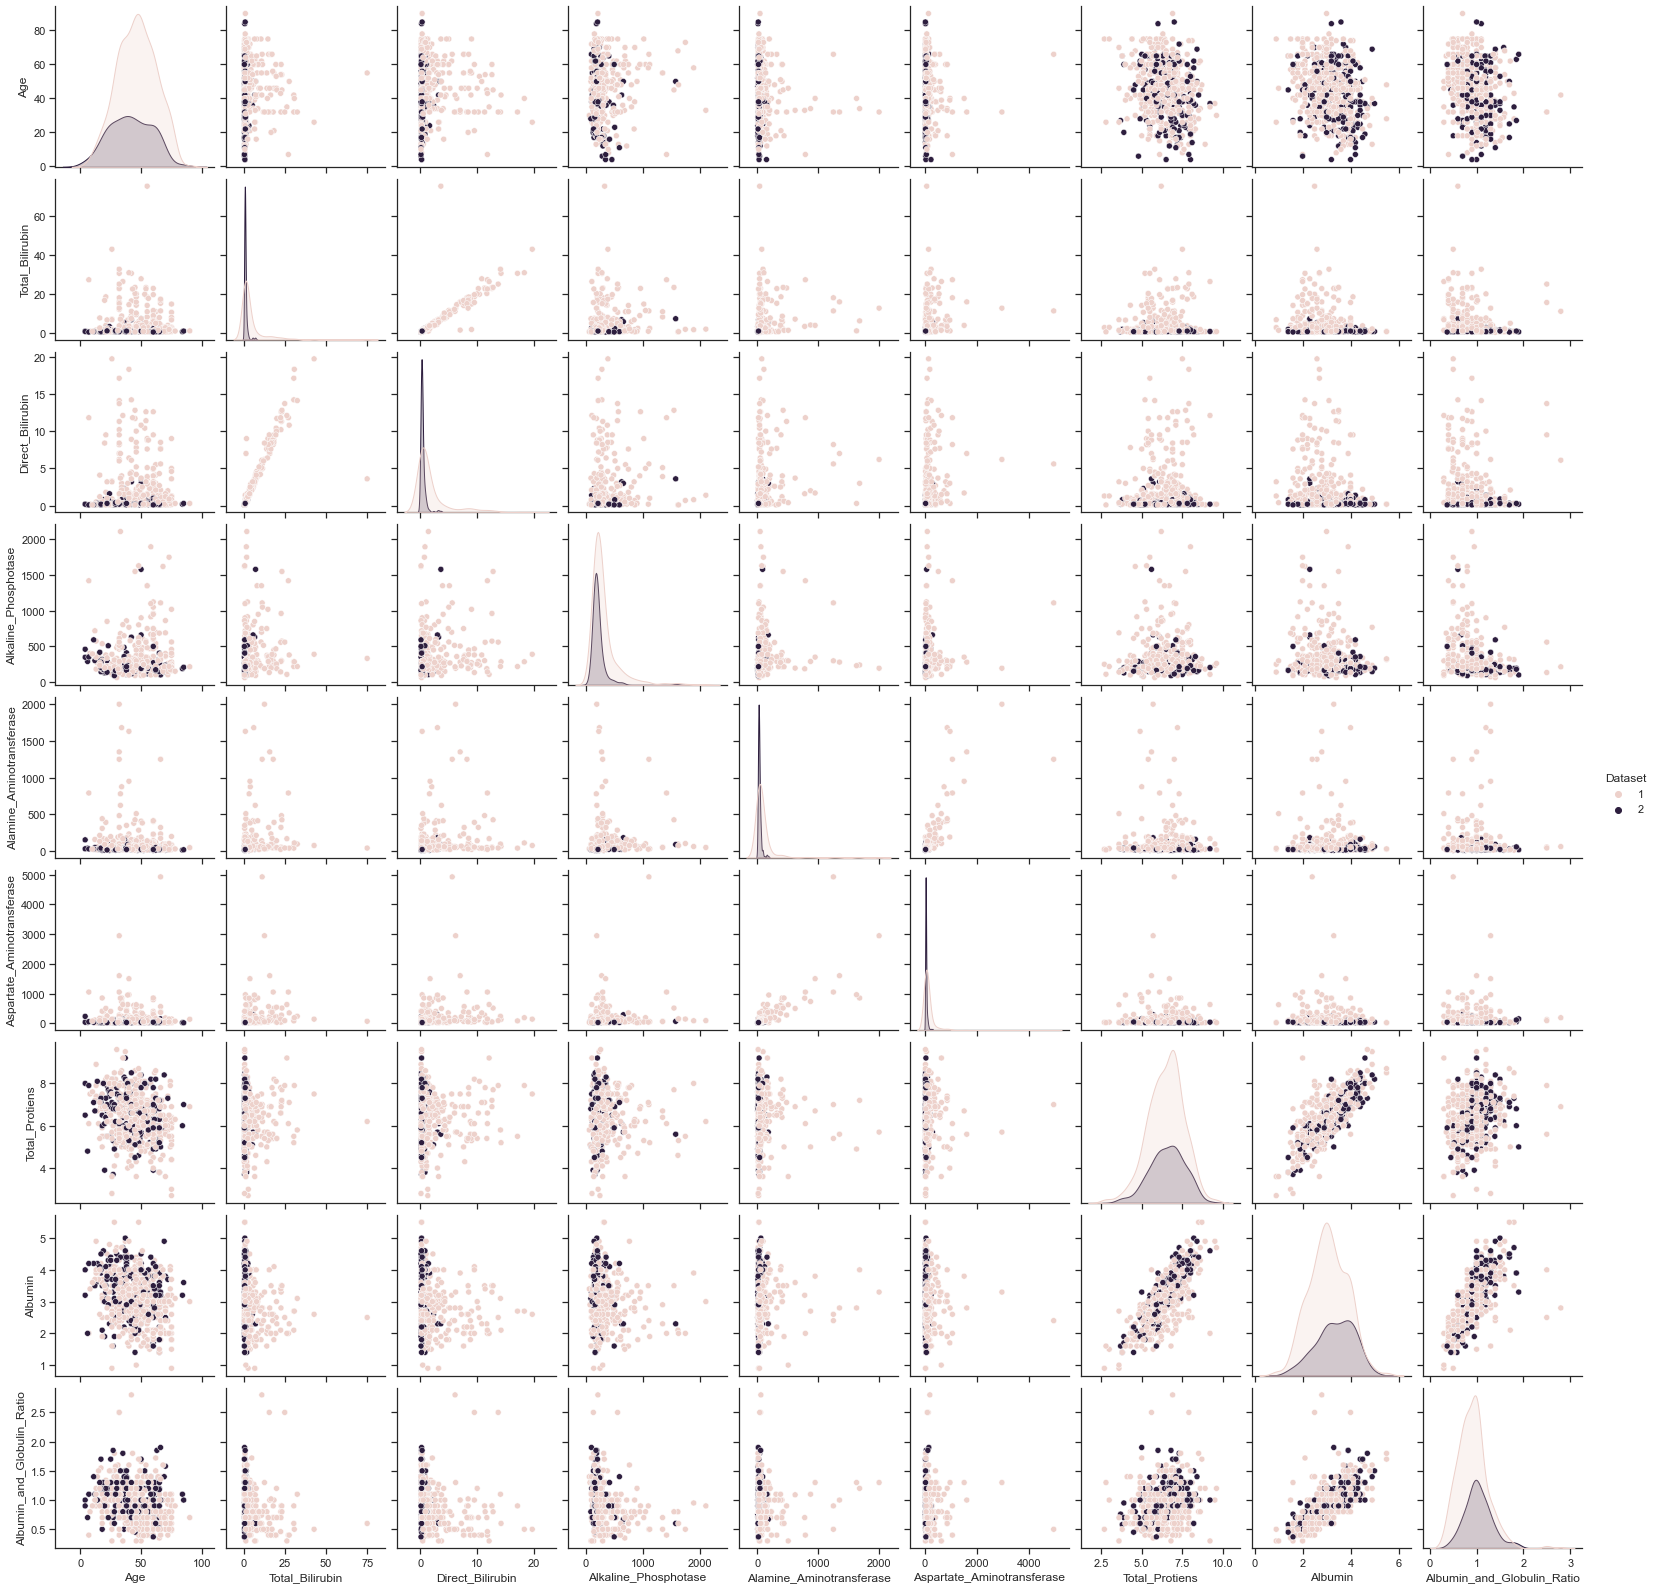

In [14]:
sn.set(style="ticks", color_codes=True)
sn.pairplot(data=data,hue='Dataset')

<AxesSubplot:xlabel='Gender', ylabel='count'>

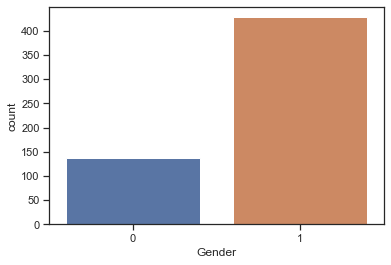

In [15]:
data['Gender']=data['Gender'].replace("Female",0)
data['Gender']=data['Gender'].replace("Male",1)

sn.countplot(x=data.Gender)

In [16]:
y=data.pop('Dataset')
x=data
x_copy=x

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
key = ['LogisticRegression','SVC','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','GaussianNB']
value = [LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GaussianNB()]
models = dict(zip(key,value))

In [21]:
predicted =[]
from sklearn.metrics import classification_report
for name,algo in models.items():
    model=algo
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)
    print(classification_report(y_test, predict))

LogisticRegression 0.631578947368421
              precision    recall  f1-score   support

           1       0.64      0.93      0.76        72
           2       0.50      0.12      0.19        42

    accuracy                           0.63       114
   macro avg       0.57      0.52      0.48       114
weighted avg       0.59      0.63      0.55       114

SVC 0.631578947368421
              precision    recall  f1-score   support

           1       0.63      1.00      0.77        72
           2       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114

DecisionTreeClassifier 0.6140350877192983
              precision    recall  f1-score   support

           1       0.67      0.76      0.71        72
           2       0.47      0.36      0.41        42

    accuracy                           0.61       114
   macro avg       0.57    

0.6228070175438597


<AxesSubplot:>

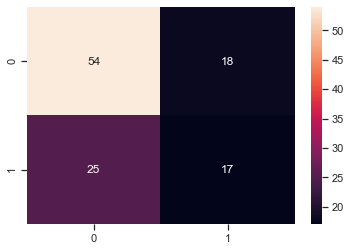

In [22]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True)

In [23]:
from sklearn.pipeline import Pipeline
sc=StandardScaler()
sc.fit(x_copy)
model_pipe=Pipeline([("scaler", sc),
                    ("model", DecisionTreeClassifier())])

model_pipe.fit(x_copy,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier())])

In [24]:
import joblib

In [25]:
joblib.dump(model_pipe,"liver_Predictor.pkl")

['liver_Predictor.pkl']

In [26]:
clf=joblib.load("liver_Predictor.pkl")
clf.predict([[65,0,0.7,0.1,187,16,18,6.8,3.3,0.9]])[0]

1